In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [2]:
# Load the data set
flights = pd.read_csv('data\\flights_dirty.csv')

In [3]:
#check the top of the data frame
flights.head()

,year,month,passengers
0,1949,jan,114.388770
1,1949,Feb,116.704857
2,1949,Mar,129.126454
3,1949,Apr,126.892509
4,1949,May,122.699105


In [4]:
# Check the bottom of DataFrame
flights.tail()

,year,month,passengers
149,1955,Feb,224.654338
150,1950,Jul,166.140905
151,1958,Oct,367.306509
152,1955,Jul,362.328765
153,1955,May,268.410765


> The `passengers` column is float instead of an `int` data  type  
> inconsistency in the string format in the `month` column

In [5]:
# Check the summary information
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        154 non-null    object 
 1   month       154 non-null    object 
 2   passengers  136 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.7+ KB


> There are missing values in the `passengers` column.  

>The `year` column data type is object rather than `integer` or `datatime`

In [6]:
# Check the descriptive statistics
flights.describe()

,passengers
count,136.000000
mean,299.633655
std,171.510392
min,-15.748963
25%,189.203060
50%,275.432094
75%,366.067432
max,1503.245434


In [7]:
flights.describe(include='O')

,year,month
count,154,154
unique,13,32
top,1955,Feb
freq,16,14


> There is a possibility of outlier with a maximum value of 1503  

> There is a negative value in passengers which is a bad data.
>
> From the dataset information available there should be 12 unique years (1949-1960). This shows 13

In [8]:
#Investigate the year column
flights['year'].unique()

array(['1949', 'unknown', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960'], dtype=object)

> There is a 'unknown' value for `year`

In [9]:
# Confirm missing values
flights.isna().sum()

year           0
month          0
passengers    18
dtype: int64

In [10]:
# Visualize the missing values 
flights.isna().sum()/len(flights)*100

year           0.000000
month          0.000000
passengers    11.688312
dtype: float64

<Axes: >

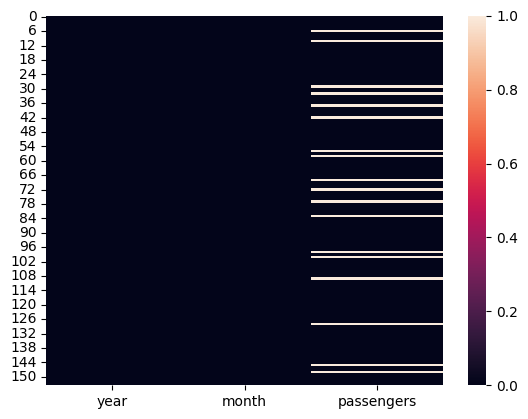

In [11]:
# Visulaize the missing value
sns.heatmap(flights.isna())

> Outcome: Missing values in `passengers` need to be handled

In [12]:
# check for duplicates values
flights.duplicated(['year', 'month'])

0      False
1      False
2      False
3      False
4      False
       ...  
149     True
150     True
151     True
152     True
153     True
Length: 154, dtype: bool

In [13]:
#How many duplicates?
flights.duplicated(['year', 'month']).sum() #rememeber True = 1

np.int64(6)

In [14]:
flights.duplicated(['year', 'month']).value_counts()

False    148
True       6
Name: count, dtype: int64

> Outcome: Duplicates detected, requires us to remove.

In [15]:
# Check the values for months column
flights['month'].value_counts()

month
Feb     14
Aug     12
Jul     12
May     11
Dec     11
Sep     11
Jan     10
Nov     10
Oct      9
Apr      9
Jun      9
Mar      9
mar      3
OCT      3
NOV      2
oct      2
apr      2
nov      1
Apr      1
jan      1
aug      1
MAY      1
JUN      1
MAY      1
jul      1
Jan      1
dec      1
sep      1
Jul      1
jun      1
Sep      1
Jun      1
Name: count, dtype: int64

In [16]:
, # Use groupby to see the mean, count and median
flights.groupby('month')['passengers'].agg(['mean', 'count', 'median'])

,mean,count,median
month,,,
Apr,255.058381,9,239.237007
Apr,126.892509,1,126.892509
Aug,368.199646,11,339.967974
Dec,261.386275,11,233.393368
Feb,237.072422,12,228.228183
JUN,268.702678,1,268.702678
Jan,391.008909,10,301.180138
Jan,NaN,0,NaN
Jul,367.283194,10,363.398796


> Inconsistent month labels needs to be corrected using -string manipulation

In [17]:
# Find month with value - 1503.245434
flights[flights['passengers'] ==1503.245434]


,year,month,passengers


In [18]:
flights['passengers'].max()

np.float64(1503.2454336631456)

In [19]:
flights[flights['passengers'] == 1503.2454336631456]

,year,month,passengers
24,1951,Jan,1503.245434


> Seems like there is an outlier - we can confirm this with a graphical EDA

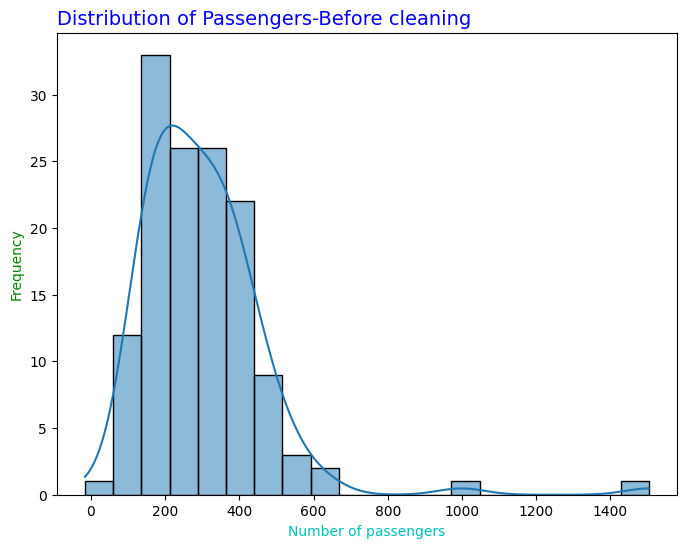

In [20]:
# Histogram to check the distribution
plt.figure(figsize=(8,6))
sns.histplot(data=flights, x='passengers', bins=20, kde=True)
plt.title('Distribution of Passengers-Before cleaning', loc='left', fontsize=14, color='b')
plt.xlabel('Number of passengers', color='c')
plt.ylabel('Frequency', color='g')
plt.show()

> outcome: Histogram confirms negative values and extreme positive outliers(>1000)`

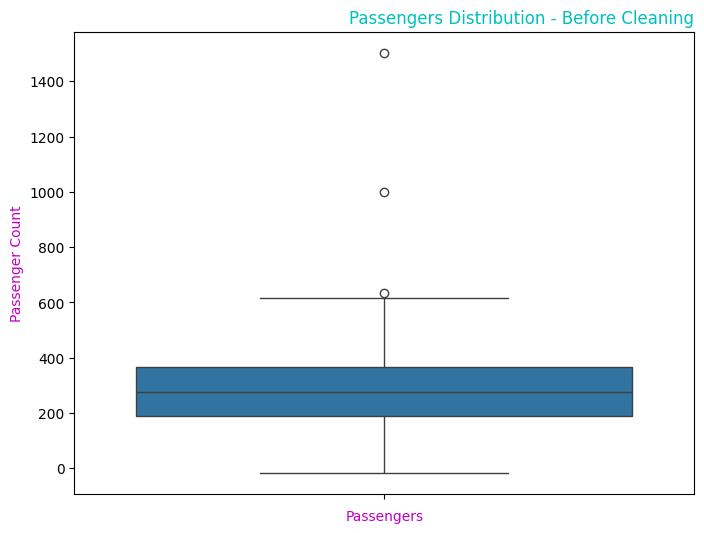

In [21]:
#Box plot to verify distribution
plt.figure(figsize=(8,6))
sns.boxplot(data=flights, y='passengers')
plt.title('Passengers Distribution - Before Cleaning', color='c', loc='right')
plt.xlabel('Passengers', color='m')
plt.ylabel('Passenger Count', color='m')
plt.show()

> Outcome: Boxplot shows extreme outliers in `passengers` column. Thus there is a confirmed need to handle outlier in the data cleaning step.

In [22]:
flights.head(2)

,year,month,passengers
0,1949,jan,114.388770
1,1949,Feb,116.704857


In [23]:
# Let see a tend of the passengers
# Lets create a new column that has the `Mon-year`
flights['Month_Year'] = flights['month'] + '-' + flights['year']
flights

,year,month,passengers,Month_Year
0,1949,jan,114.388770,jan -1949
1,1949,Feb,116.704857,Feb-1949
2,1949,Mar,129.126454,Mar-1949
3,1949,Apr,126.892509,Apr -1949
4,1949,May,122.699105,May-1949
...,...,...,...,...
149,1955,Feb,224.654338,Feb-1955
150,1950,Jul,166.140905,Jul-1950
151,1958,Oct,367.306509,Oct-1958
152,1955,Jul,362.328765,Jul-1955


In [24]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        154 non-null    object 
 1   month       154 non-null    object 
 2   passengers  136 non-null    float64
 3   Month_Year  154 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.9+ KB


<Figure size 800x400 with 0 Axes>

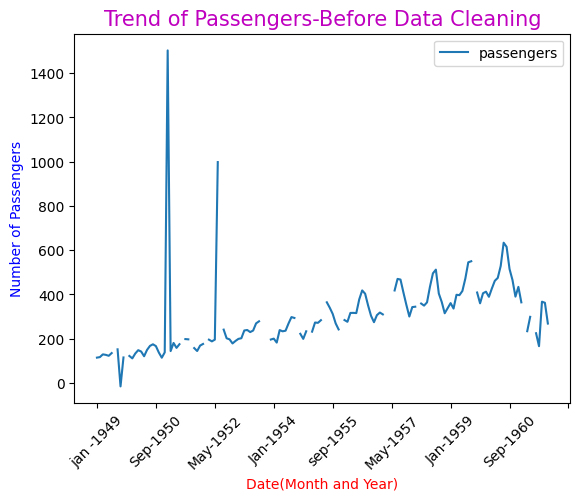

In [25]:
plt.figure(figsize=(8,4))
flights.plot('Month_Year')
plt.title('Trend of Passengers-Before Data Cleaning', fontsize=15, color='m')
plt.xlabel('Date(Month and Year)', color='r')
plt.xticks(rotation=45)
plt.ylabel('Number of Passengers', color='b')
plt.show()

> Outcome: Line plot shows erratic spikes due to the outliers and gaps due to bad and/or missing  data. Cleaning required!

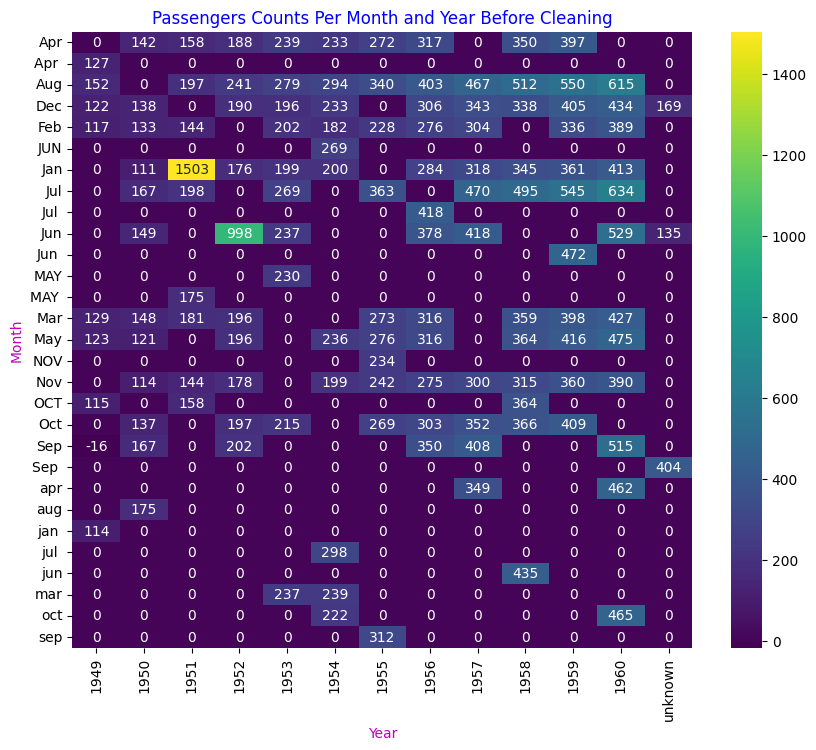

In [26]:
# Heatmap
plt.figure(figsize=(10,8))
pivot=flights.pivot_table(index='month', columns='year', values='passengers', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('Passengers Counts Per Month and Year Before Cleaning', color='b')
plt.xlabel('Year', color='m')
plt.ylabel('Month', color='m')
plt.show()

> Outcome: Heatmap shows fragmented months due to bad formatting and missing data gaps

**Data Cleaning**
    
    > Proposed steps.  

    - Standardize the moth column string format.  
    - Rename Columns to sentence case.
    - Correct the data type-Year -Itenger and `Passengers` -Integer.  
    - Fill Missing data - median.  
    - Remove the negative value row.  
    - Remove duplicates.  
    - Clean the `year` column of the `unknown` value.  
    - Clip the outlier to max and min using IQR

In [27]:
# Clean the month column
flights['month'] = flights['month'].str.title().str.strip()

In [28]:
# Check if cleaning was good
flights['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [29]:
# Rename all columns to sentence case
flights.rename(columns={'year':'Year',
                        'month':'Month',
                        'passengers':'Passengers'}, inplace=True)
flights.head(2)

,Year,Month,Passengers,Month_Year
0,1949,Jan,114.388770,jan -1949
1,1949,Feb,116.704857,Feb-1949


In [30]:
# Clean the Month_Year Column
flights.Month_Year = flights.Month + '-' + flights.Year
flights.head(2)

,Year,Month,Passengers,Month_Year
0,1949,Jan,114.388770,Jan-1949
1,1949,Feb,116.704857,Feb-1949


In [31]:
# Data type conversion
#flights['Year'] = flights['Year'].astype(init)
#flights['Passengers'] = flights['Passengers'].astype(init)


In [32]:
# Find the `years` rows with unknown as value 
flights[flights['Year'] == 'unknown']

,Year,Month,Passengers,Month_Year
5,unknown,Jun,134.963099,Jun-unknown
35,unknown,Dec,168.780609,Dec-unknown
109,unknown,Feb,NaN,Feb-unknown
116,unknown,Sep,404.036532,Sep-unknown
148,unknown,Sep,NaN,Sep-unknown


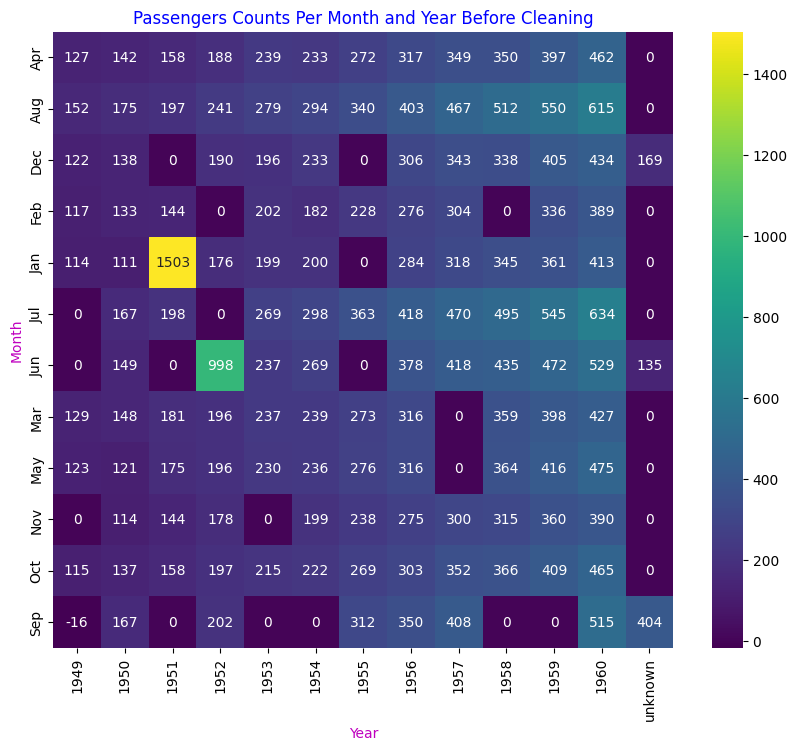

In [33]:

plt.figure(figsize=(10,8))
pivot=flights.pivot_table(index='Month', columns='Year', values='Passengers', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('Passengers Counts Per Month and Year Before Cleaning', color='b')
plt.xlabel('Year', color='m')
plt.ylabel('Month', color='m')
plt.show()

> After a review of the heatmap of missing months that correspond to available in `unknown` we can select 1951 as the year for these data.

In [34]:
flights.loc[flights['Year'] == 'unknown', 'Year'] = 1951

In [35]:
# Confirm that we have valid years
flights['Year'].unique()

array(['1949', 1951, '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960'], dtype=object)

In [36]:
flights.loc[flights['Year'] == 1951, 'Year'] = '1951'

In [37]:
flights['Year'].unique()

array(['1949', '1951', '1950', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960'], dtype=object)

In [38]:
# Data type conversion
flights['Year'] = flights['Year'].astype(init)
flights['Passengers'] = flights['Passengers'].astype(init)


NameError: name 'init' is not defined

In [39]:
flights.isna().sum()

Year           0
Month          0
Passengers    18
Month_Year     0
dtype: int64

In [40]:
# Remove negative values -turn to NA
flights.loc[flights['Passengers']<0, 'Passengers']=np.nan

In [41]:
flights.isna().sum()

Year           0
Month          0
Passengers    19
Month_Year     0
dtype: int64

In [42]:
# Fill the missing values with median
flights.fillna(flights['Passengers'].median(), inplace =True)

In [43]:
flights.isna().sum()

Year          0
Month         0
Passengers    0
Month_Year    0
dtype: int64

In [44]:
# Change the data types
flights['Year'] = flights['Year'].astype(int)
flights['Passengers'] = flights['Passengers'].astype(int)


In [45]:
#Drop duplicated
flights.drop_duplicates(['Year', 'Month'], inplace=True)

In [46]:
flights.duplicated(['Year', 'Month']).value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Length: 141, dtype: bool>

In [47]:
# Handling of outliers
Q1 = flights['Passengers'].quantile(0.25)
Q3 = flights['Passengers'].quantile(0.75)

IQR = Q3-Q1

In [48]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [49]:
 flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        141 non-null    int64 
 1   Month       141 non-null    object
 2   Passengers  141 non-null    int64 
 3   Month_Year  141 non-null    object
dtypes: int64(2), object(2)
memory usage: 5.5+ KB


In [50]:
flights['Passengers'] = flights['Passengers'].clip(lower=lower_bound, upper=upper_bound)

In [51]:
flights['Passengers'] 

0      114
1      116
2      129
3      126
4      122
      ... 
139    606
140    514
141    465
142    390
143    434
Name: Passengers, Length: 141, dtype: int64

In [52]:
flights[(flights['Passengers']< lower_bound)| (flights['Passengers']>upper_bound)]

,Year,Month,Passengers,Month_Year


In [53]:
outliers = flights[(flights['Passengers']< lower_bound)| (flights['Passengers']>upper_bound)]

In [54]:
outliers

,Year,Month,Passengers,Month_Year


In [56]:
flights['Passengers'] = flights['Passengers'].clip(lower=lower_bound, upper=upper_bound)

In [57]:
flights['Month_year'] = flights['Month'] + '-' +flights['Year']

TypeError: can only concatenate str (not "int") to str

**Final EDA**

In [58]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        141 non-null    int64 
 1   Month       141 non-null    object
 2   Passengers  141 non-null    int64 
 3   Month_Year  141 non-null    object
dtypes: int64(2), object(2)
memory usage: 5.5+ KB


In [59]:
# NUMERICAL DESCRIPTIVE STATISTICS
flights.describe()

,Year,Passengers
count,141.000000,141.000000
mean,1954.489362,289.553191
std,3.444700,120.809379
min,1949.000000,110.000000
25%,1952.000000,196.000000
50%,1954.000000,276.000000
75%,1957.000000,360.000000
max,1960.000000,606.000000


In [60]:
# CATEGORICAL DESCRIPTIVE STATISTICS
flights.describe(include='O')

,Month,Month_Year
count,141,141
unique,12,141
top,Jan,Jan-1949
freq,12,1


In [61]:
# group by
flights.groupby('Month')['Passengers'].agg(['mean', 'median'])

,mean,median
Month,,
Apr,268.833333,255.0
Aug,350.833333,316.0
Dec,262.166667,254.5
Feb,235.636364,231.0
Jan,283.250000,280.0
Jul,365.083333,330.5
Jun,354.272727,377.0
Mar,264.500000,255.5
May,267.000000,256.0


In [62]:
# groupby Month-year column
flights.groupby('Month_Year')['Passengers'].agg(['mean', 'median'])

,mean,median
Month_Year,,
Apr-1949,126.0,126.0
Apr-1950,141.0,141.0
Apr-1951,158.0,158.0
Apr-1952,187.0,187.0
Apr-1953,239.0,239.0
...,...,...
Sep-1955,311.0,311.0
Sep-1956,350.0,350.0
Sep-1957,408.0,408.0


In [63]:
# Graphical EDA
sns.set_style('whitegrid')

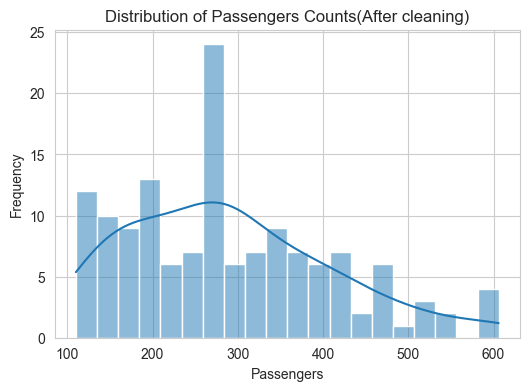

In [64]:
# Histogram 
plt.figure(figsize=(6,4))
sns.histplot(flights['Passengers'], bins=20, kde=True)
plt.title('Distribution of Passengers Counts(After cleaning)')
plt.xlabel('Passengers')
plt.ylabel('Frequency')
plt.show()
           

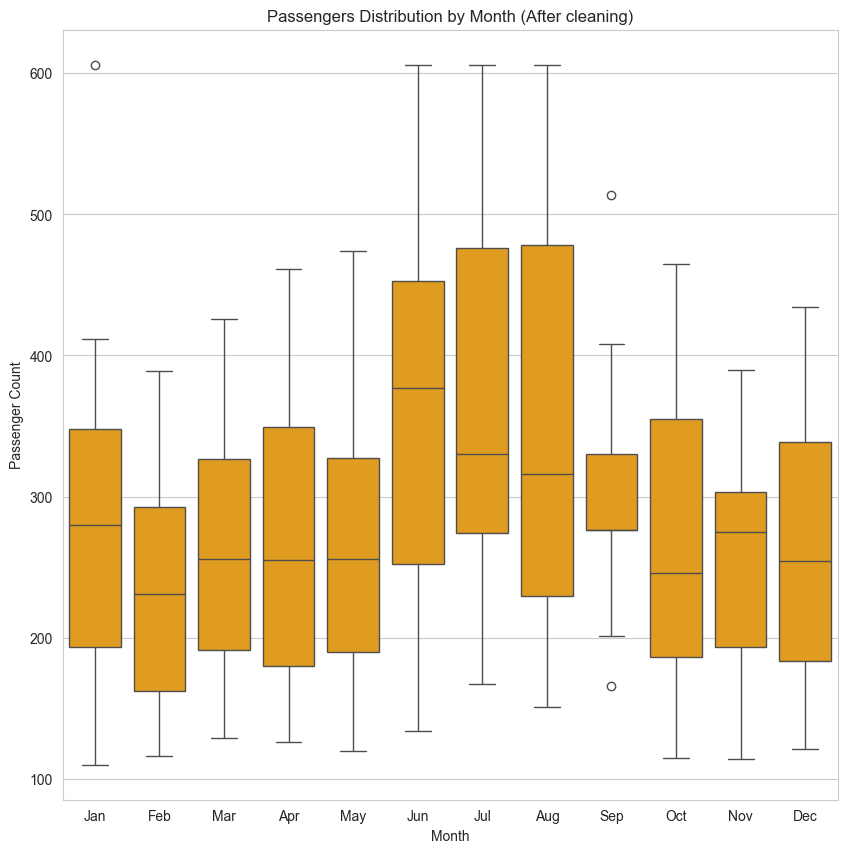

In [65]:
# Box plot
plt.figure(figsize=(10,10))
sns.boxplot(data=flights, x='Month', y='Passengers', color='orange')
plt.title('Passengers Distribution by Month (After cleaning)')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.show()

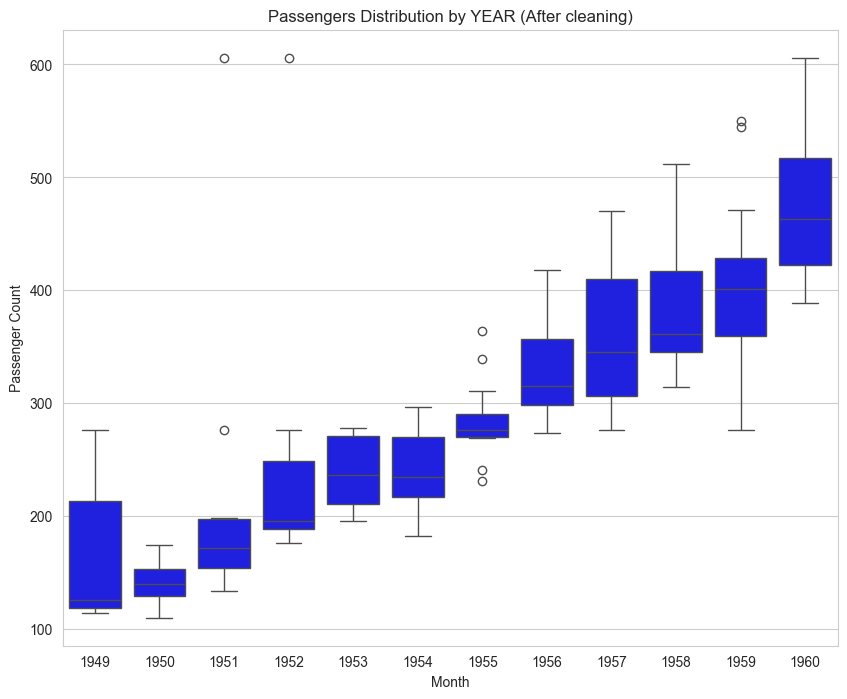

In [66]:
# Box plot
plt.figure(figsize=(10,8))
sns.boxplot(data=flights, x='Year', y='Passengers', color='blue')
plt.title('Passengers Distribution by YEAR (After cleaning)')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.show()

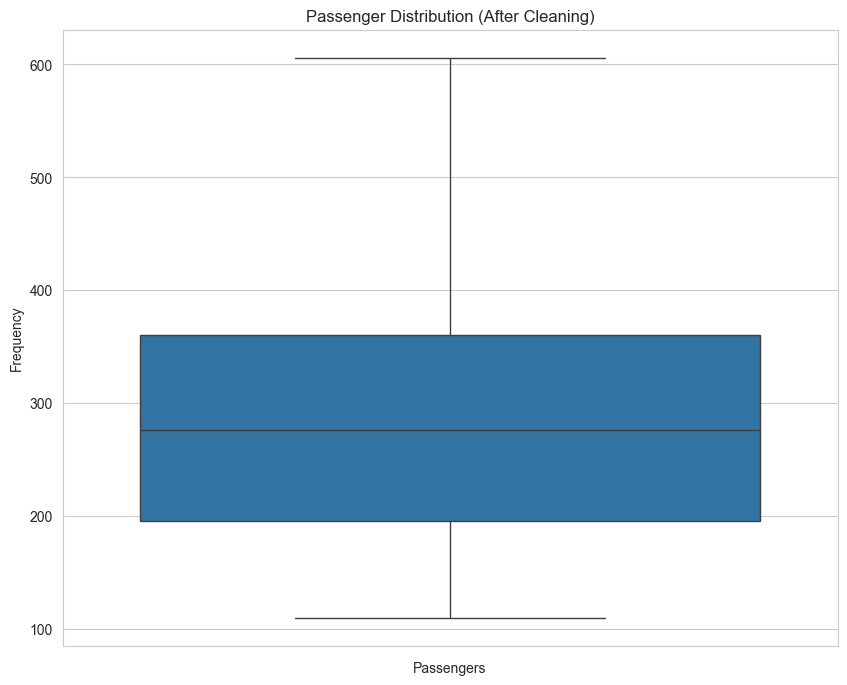

In [67]:
# Box plot of the full passengers column
plt.figure(figsize=(10, 8))
sns.boxplot(data=flights, y='Passengers')
plt.title('Passenger Distribution (After Cleaning)')
plt.xlabel('Passengers')
plt.ylabel('Frequency')
plt.show()

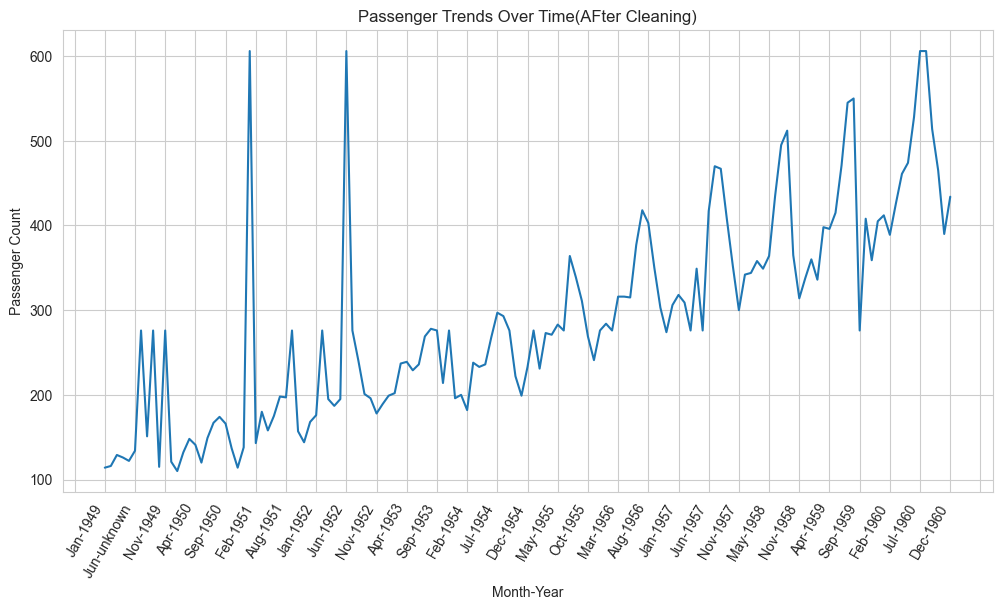

In [68]:
## Line plot: Passenger trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x='Month_Year', y='Passengers')
plt.title('Passenger Trends Over Time(AFter Cleaning)')
plt.xticks(rotation=60, ha='right')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.xlabel('Month-Year')
plt.ylabel('Passenger Count')
plt.show()

**Insights Driven Questions and analysis**

In [69]:
#Question 1: Which months shows the highest passenger count as aan verage
month_avg = flights.groupby('Month')['Passengers'].mean().sort_values(ascending=False)

print(f'\nAverage Passenger count:{month_avg}')


Average Passenger count:Month
Jul    365.083333
Jun    354.272727
Aug    350.833333
Sep    302.727273
Jan    283.250000
Apr    268.833333
May    267.000000
Oct    266.916667
Mar    264.500000
Dec    262.166667
Nov    255.416667
Feb    235.636364
Name: Passengers, dtype: float64


In [70]:
# Question 2: Is there a clear upward trend in passengers numbers over the years
yearly_trend = flights.groupby('Year')['Passengers'].sum()

In [71]:
yearly_trend

Year
1949    1822
1950    1696
1951    2536
1952    2915
1953    2851
1954    2877
1955    3410
1956    3938
1957    4284
1958    3874
1959    4919
1960    5705
Name: Passengers, dtype: int64

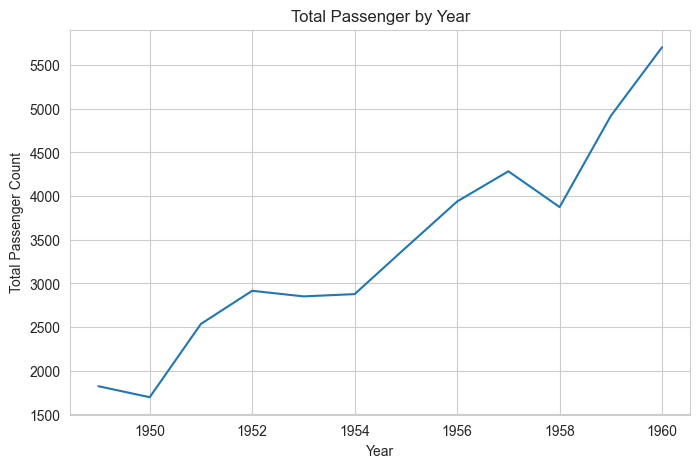

In [72]:
# Plot the yearly trend
plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values)
plt.title('Total Passenger by Year')
plt.xlabel('Year')
plt.ylabel('Total Passenger Count')
plt.show()

In [73]:
seasonal = flights.groupby('Month'),['Passengers'].mean()

AttributeError: 'list' object has no attribute 'mean'

In [74]:
month 

NameError: name 'month' is not defined

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x=seasonal.index, y=seasonal.values)
plt.title('Average Passengers by month (Seasonal Patterns)')
plt.xlabel('motnth')
plt.ylabel('Average passengers')
plt.xticks(rotation=45)
plt.show

NameError: name 'seasonal' is not defined

<Figure size 800x600 with 0 Axes>

Enter Month to plot(e.g. Jan) Jan


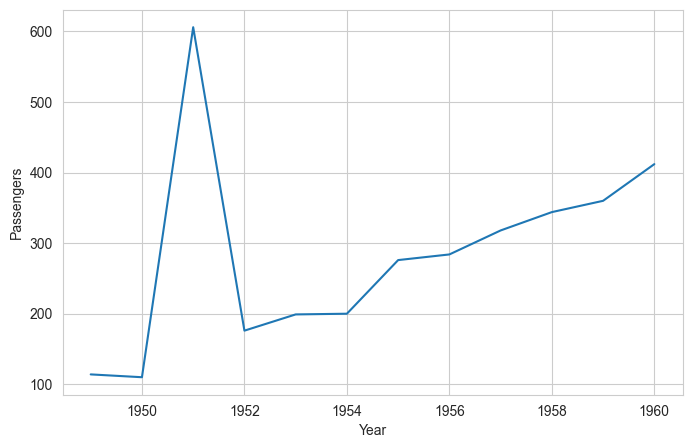

In [77]:
#Question 4: How do passenger counts vary by year for a specific month
mon = input('Enter Month to plot(e.g. Jan)')
data = flights[flights['Month'] == mon]
plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Year', y='Passengers')
plt.show()

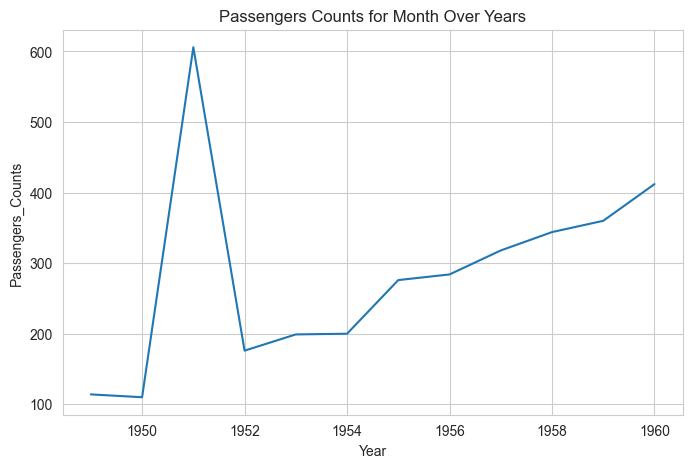

In [78]:
def plot_month(month):
    data = flights[flights['Month'] == mon]
plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Year', y='Passengers')
plt.title(f'Passengers Counts for {'Month'} Over Years')
plt.xlabel('Year')
plt.ylabel('Passengers_Counts')
plt.show()
    

**Example Problem Statement**

1. **Demand Forecasting**: Can we predict future passenger counts based on historical trends and seasonality?
2. **Seasonal Marketing**: Which months should the airline target for promotional campaigns to boost low-demand periods?
3. **Capacity planning**: How can the airline optimize flight schedules based on monthly passenger trends?
4. **Anomaly Detection**: Are there any unusual spikes or drops i passenger count that require further investigation?
5. **Growth Analysis**: What is the overall growth rate of passenger counts over the year, and is it consistent?
6. **Data Quality Assessment**: How reliable is the dataset after cleaning, and what impact do outliers or missing data have on insights